# Analyzing and Predicting Store Sales





# Loading the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
# load the dataset
stores = pd.read_csv('stores.csv')
print("Keys of stores data: {}".format(stores.keys()))

Keys of stores data: Index(['Store', 'Type', 'Size'], dtype='object')


In [2]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [3]:
train = pd.read_csv('data.csv')
print("Keys of the data: {}".format(train.keys()))

Keys of the data: Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')


In [4]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [5]:
features = pd.read_csv('features.csv')
print("Keys of features data: {}".format(features.keys()))

Keys of features data: Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')


In [6]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [7]:
print("Data length: {}".format(len(train)))
print("Feature data length: {}".format(len(features)))
print("Stores data length: {}".format(len(stores)))

Data length: 421570
Feature data length: 8190
Stores data length: 45


In [8]:
df = pd.merge(train,stores)
df = pd.merge(df,features)
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [9]:
df.tail() # Get an overview of the data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
421565,45,93,2012-10-26,2487.80,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421566,45,94,2012-10-26,5203.31,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421567,45,95,2012-10-26,56017.47,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421568,45,97,2012-10-26,6817.48,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421569,45,98,2012-10-26,1076.80,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


In [10]:
df.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


In [11]:
print("Total data length: {}".format(len(df)))
df.isnull().sum()

Total data length: 421570


Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [13]:
# Here we fill in the null values with 0 or the mean of the column data.
# After experimenting with both mean and 0 and running the model, 
# we did not observe any difference in accuracy or the R^2 value improvement, so we keept the null value replacement with 0
#values = {'MarkDown1': df['MarkDown1'].mean(),'MarkDown2': df['MarkDown2'].mean(),'MarkDown3': df['MarkDown3'].mean(),'MarkDown4': df['MarkDown4'].mean(),'MarkDown5': df['MarkDown5'].mean()}
#df.fillna(value=values, inplace=True)
df.fillna(0, inplace=True)
df.isnull().sum()

In [14]:
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

In [15]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as py
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.tools as tls

headers = list(df)
print("headers: {}".format(headers))

headers: ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']


## Visualizing the data

In this section we will build visualizations by using the Seaborn and the Matplotlib packages.

We are interested in finding corelations among various attributes.

In [16]:
print("Keys of train data: {}".format(df.keys()))

Keys of train data: Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')


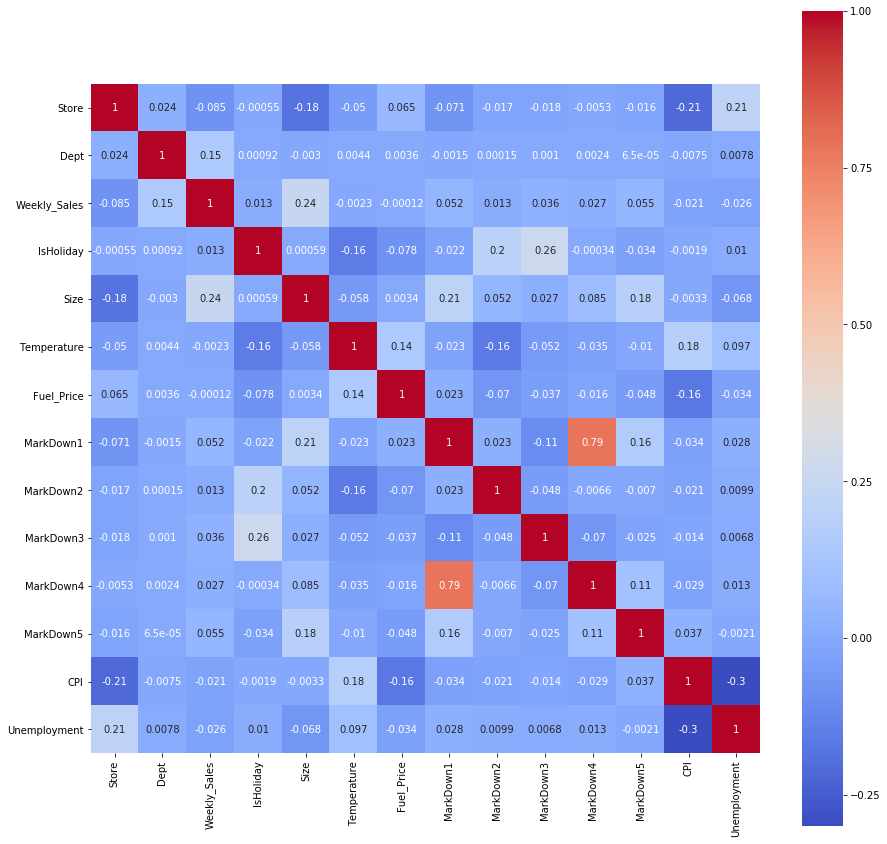

In [17]:
import seaborn as sns
%matplotlib inline

attributes = list(df.columns[0:16])
plt.figure(figsize=(15,15))
sns.heatmap(df[attributes].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

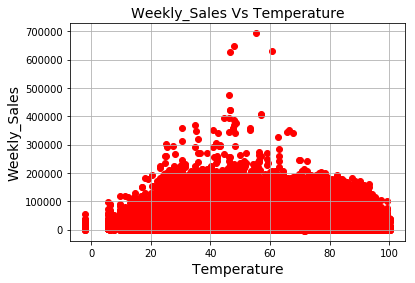

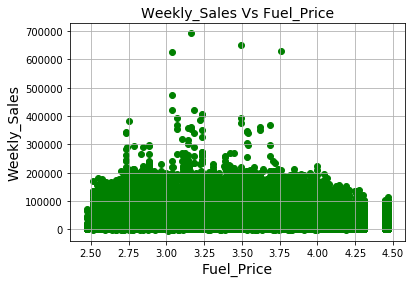

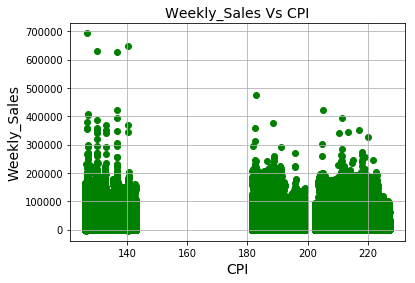

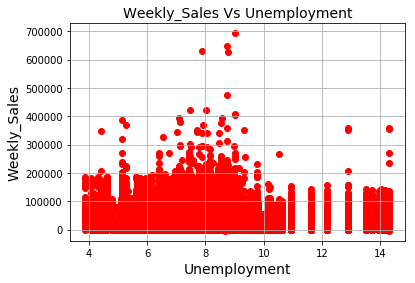

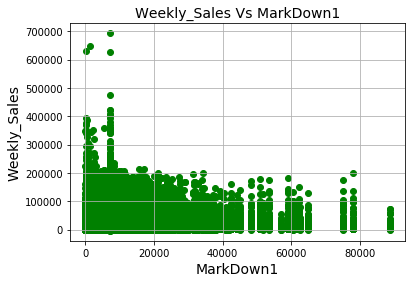

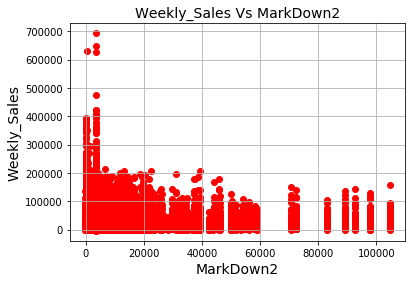

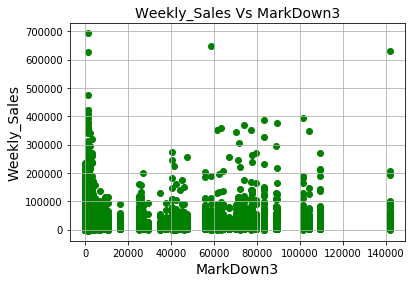

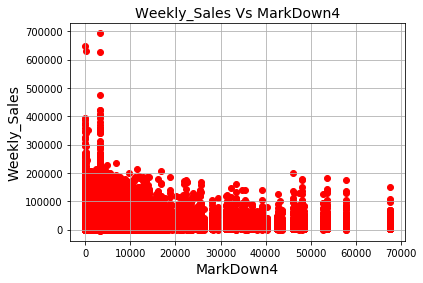

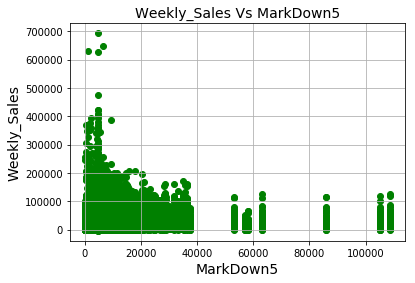

NameError: name 'le' is not defined

In [18]:
plt.scatter(df['Temperature'], df['Weekly_Sales'], color='red')
plt.title('Weekly_Sales Vs Temperature', fontsize=14)
plt.xlabel('Temperature', fontsize=14)
plt.ylabel('Weekly_Sales', fontsize=14)
plt.grid(True)
plt.show()
 
plt.scatter(df['Fuel_Price'], df['Weekly_Sales'], color='green')
plt.title('Weekly_Sales Vs Fuel_Price', fontsize=14)
plt.xlabel('Fuel_Price', fontsize=14)
plt.ylabel('Weekly_Sales', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df['CPI'], df['Weekly_Sales'], color='green')
plt.title('Weekly_Sales Vs CPI', fontsize=14)
plt.xlabel('CPI', fontsize=14)
plt.ylabel('Weekly_Sales', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df['Unemployment'], df['Weekly_Sales'], color='red')
plt.title('Weekly_Sales Vs Unemployment', fontsize=14)
plt.xlabel('Unemployment', fontsize=14)
plt.ylabel('Weekly_Sales', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df['MarkDown1'], df['Weekly_Sales'], color='green')
plt.title('Weekly_Sales Vs MarkDown1', fontsize=14)
plt.xlabel('MarkDown1', fontsize=14)
plt.ylabel('Weekly_Sales', fontsize=14)
plt.grid(True)
plt.show()


plt.scatter(df['MarkDown2'], df['Weekly_Sales'], color='red')
plt.title('Weekly_Sales Vs MarkDown2', fontsize=14)
plt.xlabel('MarkDown2', fontsize=14)
plt.ylabel('Weekly_Sales', fontsize=14)
plt.grid(True)
plt.show()


plt.scatter(df['MarkDown3'], df['Weekly_Sales'], color='green')
plt.title('Weekly_Sales Vs MarkDown3', fontsize=14)
plt.xlabel('MarkDown3', fontsize=14)
plt.ylabel('Weekly_Sales', fontsize=14)
plt.grid(True)
plt.show()


plt.scatter(df['MarkDown4'], df['Weekly_Sales'], color='red')
plt.title('Weekly_Sales Vs MarkDown4', fontsize=14)
plt.xlabel('MarkDown4', fontsize=14)
plt.ylabel('Weekly_Sales', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df['MarkDown5'], df['Weekly_Sales'], color='green')
plt.title('Weekly_Sales Vs MarkDown5', fontsize=14)
plt.xlabel('MarkDown5', fontsize=14)
plt.ylabel('Weekly_Sales', fontsize=14)
plt.grid(True)
plt.show()


# Transform 'IsHoliday' to numeric
df_t = df.copy()
df_t['IsHoliday'] = le.fit_transform(df['IsHoliday'].astype('str'))


plt.scatter(df_t['IsHoliday'], df_t['Weekly_Sales'], color='red')
plt.title('Weekly_Sales Vs IsHoliday', fontsize=14)
plt.xlabel('IsHoliday', fontsize=14)
plt.ylabel('Weekly_Sales', fontsize=14)
plt.grid(True)
plt.show()


## Some Utility Functions for Data Transformation

In [20]:
from datetime import datetime

def getWeek(dateStr):
    dt = datetime.strptime(dateStr, "%Y-%m-%d")
    return dt.isocalendar()[1]

def getQuarter(dateStr):
    dt = datetime.strptime(dateStr, "%Y-%m-%d")
    quarter = dt.isocalendar()[1] // 13
    if quarter <= 3:
        quarter = quarter +1
    return quarter

def getYear(dateStr):
    dt = datetime.strptime(dateStr, "%Y-%m-%d")
    return dt.isocalendar()[0]

#getQuarter("2012-12-12")

### Transform Data

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Transform 'IsHoliday' to numeric
dft = df.copy()
le = LabelEncoder()
dft['IsHoliday'] = le.fit_transform(dft['IsHoliday'].astype('str'))

WeekOfYear = []
quarter = []
year = []
for date in dft['Date']:
    WeekOfYear.append(getWeek(date))
    quarter.append(getQuarter(date))
    year.append(getYear(date))

dft['WeekOfYear'] = WeekOfYear
dft['Quarter'] = quarter
dft['Year'] = year

dft_ohe = pd.get_dummies(dft, columns=['Type', 'Size', 'Store', 'Dept', 'Quarter', 'WeekOfYear'])
#dft_ohe = pd.get_dummies(dft, columns=['Type', 'Size', 'Store', 'Dept', 'Quarter'])

print(" data length: {}".format(len(dft_ohe)))
print(" data shape: {}".format(dft_ohe.shape))

 data length: 421570
 data shape: (421570, 238)


In [22]:
headers = list(dft_ohe)
print("headers: {}".format(headers))

headers: ['Date', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Year', 'Type_A', 'Type_B', 'Type_C', 'Size_34875', 'Size_37392', 'Size_39690', 'Size_39910', 'Size_41062', 'Size_42988', 'Size_57197', 'Size_70713', 'Size_93188', 'Size_93638', 'Size_103681', 'Size_112238', 'Size_114533', 'Size_118221', 'Size_119557', 'Size_120653', 'Size_123737', 'Size_125833', 'Size_126512', 'Size_128107', 'Size_140167', 'Size_151315', 'Size_152513', 'Size_155078', 'Size_155083', 'Size_158114', 'Size_184109', 'Size_196321', 'Size_200898', 'Size_202307', 'Size_202505', 'Size_203007', 'Size_203742', 'Size_203750', 'Size_203819', 'Size_204184', 'Size_205863', 'Size_206302', 'Size_207499', 'Size_219622', 'Store_1', 'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6', 'Store_7', 'Store_8', 'Store_9', 'Store_10', 'Store_11', 'Store_12', 'Store_13', 'Store_14', 'Store_15', 'Store_16', 'Store_17', 'Store_18', '

### Split Data in Train and Test

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X_train, X_test, y_train, y_test = train_test_split(
    dft_ohe, dft_ohe['Weekly_Sales'], random_state=42)

print("X_train data length: {}".format(len(X_train)))
print("X_train data shape: {}".format(X_train.shape))

print("X_test data length: {}".format(len(X_test)))
print("X_test data shape: {}".format(X_test.shape))

print("y_train data length: {}".format(len(y_train)))
print("y_train data shape: {}".format(y_train.shape))

print("y_test data length: {}".format(len(y_test)))
print("y_test data shape: {}".format(y_test.shape))

X_train data length: 316177
X_train data shape: (316177, 238)
X_test data length: 105393
X_test data shape: (105393, 238)
y_train data length: 316177
y_train data shape: (316177,)
y_test data length: 105393
y_test data shape: (105393,)


In [24]:
X_train.head(2)

,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,WeekOfYear_43,WeekOfYear_44,WeekOfYear_45,WeekOfYear_46,WeekOfYear_47,WeekOfYear_48,WeekOfYear_49,WeekOfYear_50,WeekOfYear_51,WeekOfYear_52
150504,2010-10-29,6.00,0,35.76,2.748,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,...,1,0,0,0,0,0,0,0,0,0
216043,2012-08-10,1898.57,0,76.74,3.772,7212.770000,22.870000,15.430000,2623.170000,1906.300000,...,0,0,0,0,0,0,0,0,0,0


In [25]:
X_test.head(2)

,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,WeekOfYear_43,WeekOfYear_44,WeekOfYear_45,WeekOfYear_46,WeekOfYear_47,WeekOfYear_48,WeekOfYear_49,WeekOfYear_50,WeekOfYear_51,WeekOfYear_52
272342,2011-07-15,21577.44,0,88.10,3.692,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,...,0,0,0,0,0,0,0,0,0,0
176581,2012-08-31,8370.28,0,70.09,3.884,20913.040000,7.980000,98.980000,9800.500000,4527.800000,...,0,0,0,0,0,0,0,0,0,0


### Remove `Date` and `Weekly_Sales` from the Train and Test Data

In [26]:
#remove the Weekly_Sales, and Date column from the train and test data
X_train = X_train[['IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Year', 'Type_A', 'Type_B', 'Type_C', 'Size_34875', 'Size_37392', 'Size_39690', 'Size_39910', 'Size_41062', 'Size_42988', 'Size_57197', 'Size_70713', 'Size_93188', 'Size_93638', 'Size_103681', 'Size_112238', 'Size_114533', 'Size_118221', 'Size_119557', 'Size_120653', 'Size_123737', 'Size_125833', 'Size_126512', 'Size_128107', 'Size_140167', 'Size_151315', 'Size_152513', 'Size_155078', 'Size_155083', 'Size_158114', 'Size_184109', 'Size_196321', 'Size_200898', 'Size_202307', 'Size_202505', 'Size_203007', 'Size_203742', 'Size_203750', 'Size_203819', 'Size_204184', 'Size_205863', 'Size_206302', 'Size_207499', 'Size_219622', 'Store_1', 'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6', 'Store_7', 'Store_8', 'Store_9', 'Store_10', 'Store_11', 'Store_12', 'Store_13', 'Store_14', 'Store_15', 'Store_16', 'Store_17', 'Store_18', 'Store_19', 'Store_20', 'Store_21', 'Store_22', 'Store_23', 'Store_24', 'Store_25', 'Store_26', 'Store_27', 'Store_28', 'Store_29', 'Store_30', 'Store_31', 'Store_32', 'Store_33', 'Store_34', 'Store_35', 'Store_36', 'Store_37', 'Store_38', 'Store_39', 'Store_40', 'Store_41', 'Store_42', 'Store_43', 'Store_44', 'Store_45', 'Dept_1', 'Dept_2', 'Dept_3', 'Dept_4', 'Dept_5', 'Dept_6', 'Dept_7', 'Dept_8', 'Dept_9', 'Dept_10', 'Dept_11', 'Dept_12', 'Dept_13', 'Dept_14', 'Dept_16', 'Dept_17', 'Dept_18', 'Dept_19', 'Dept_20', 'Dept_21', 'Dept_22', 'Dept_23', 'Dept_24', 'Dept_25', 'Dept_26', 'Dept_27', 'Dept_28', 'Dept_29', 'Dept_30', 'Dept_31', 'Dept_32', 'Dept_33', 'Dept_34', 'Dept_35', 'Dept_36', 'Dept_37', 'Dept_38', 'Dept_39', 'Dept_40', 'Dept_41', 'Dept_42', 'Dept_43', 'Dept_44', 'Dept_45', 'Dept_46', 'Dept_47', 'Dept_48', 'Dept_49', 'Dept_50', 'Dept_51', 'Dept_52', 'Dept_54', 'Dept_55', 'Dept_56', 'Dept_58', 'Dept_59', 'Dept_60', 'Dept_65', 'Dept_67', 'Dept_71', 'Dept_72', 'Dept_74', 'Dept_77', 'Dept_78', 'Dept_79', 'Dept_80', 'Dept_81', 'Dept_82', 'Dept_83', 'Dept_85', 'Dept_87', 'Dept_90', 'Dept_91', 'Dept_92', 'Dept_93', 'Dept_94', 'Dept_95', 'Dept_96', 'Dept_97', 'Dept_98', 'Dept_99', 'Quarter_1', 'Quarter_2', 'Quarter_3', 'Quarter_4', 'WeekOfYear_1', 'WeekOfYear_2', 'WeekOfYear_3', 'WeekOfYear_4', 'WeekOfYear_5', 'WeekOfYear_6', 'WeekOfYear_7', 'WeekOfYear_8', 'WeekOfYear_9', 'WeekOfYear_10', 'WeekOfYear_11', 'WeekOfYear_12', 'WeekOfYear_13', 'WeekOfYear_14', 'WeekOfYear_15', 'WeekOfYear_16', 'WeekOfYear_17', 'WeekOfYear_18', 'WeekOfYear_19', 'WeekOfYear_20', 'WeekOfYear_21', 'WeekOfYear_22', 'WeekOfYear_23', 'WeekOfYear_24', 'WeekOfYear_25', 'WeekOfYear_26', 'WeekOfYear_27', 'WeekOfYear_28', 'WeekOfYear_29', 'WeekOfYear_30', 'WeekOfYear_31', 'WeekOfYear_32', 'WeekOfYear_33', 'WeekOfYear_34', 'WeekOfYear_35', 'WeekOfYear_36', 'WeekOfYear_37', 'WeekOfYear_38', 'WeekOfYear_39', 'WeekOfYear_40', 'WeekOfYear_41', 'WeekOfYear_42', 'WeekOfYear_43', 'WeekOfYear_44', 'WeekOfYear_45', 'WeekOfYear_46', 'WeekOfYear_47', 'WeekOfYear_48', 'WeekOfYear_49', 'WeekOfYear_50', 'WeekOfYear_51', 'WeekOfYear_52']]
X_test = X_test[['IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Year', 'Type_A', 'Type_B', 'Type_C', 'Size_34875', 'Size_37392', 'Size_39690', 'Size_39910', 'Size_41062', 'Size_42988', 'Size_57197', 'Size_70713', 'Size_93188', 'Size_93638', 'Size_103681', 'Size_112238', 'Size_114533', 'Size_118221', 'Size_119557', 'Size_120653', 'Size_123737', 'Size_125833', 'Size_126512', 'Size_128107', 'Size_140167', 'Size_151315', 'Size_152513', 'Size_155078', 'Size_155083', 'Size_158114', 'Size_184109', 'Size_196321', 'Size_200898', 'Size_202307', 'Size_202505', 'Size_203007', 'Size_203742', 'Size_203750', 'Size_203819', 'Size_204184', 'Size_205863', 'Size_206302', 'Size_207499', 'Size_219622', 'Store_1', 'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6', 'Store_7', 'Store_8', 'Store_9', 'Store_10', 'Store_11', 'Store_12', 'Store_13', 'Store_14', 'Store_15', 'Store_16', 'Store_17', 'Store_18', 'Store_19', 'Store_20', 'Store_21', 'Store_22', 'Store_23', 'Store_24', 'Store_25', 'Store_26', 'Store_27', 'Store_28', 'Store_29', 'Store_30', 'Store_31', 'Store_32', 'Store_33', 'Store_34', 'Store_35', 'Store_36', 'Store_37', 'Store_38', 'Store_39', 'Store_40', 'Store_41', 'Store_42', 'Store_43', 'Store_44', 'Store_45', 'Dept_1', 'Dept_2', 'Dept_3', 'Dept_4', 'Dept_5', 'Dept_6', 'Dept_7', 'Dept_8', 'Dept_9', 'Dept_10', 'Dept_11', 'Dept_12', 'Dept_13', 'Dept_14', 'Dept_16', 'Dept_17', 'Dept_18', 'Dept_19', 'Dept_20', 'Dept_21', 'Dept_22', 'Dept_23', 'Dept_24', 'Dept_25', 'Dept_26', 'Dept_27', 'Dept_28', 'Dept_29', 'Dept_30', 'Dept_31', 'Dept_32', 'Dept_33', 'Dept_34', 'Dept_35', 'Dept_36', 'Dept_37', 'Dept_38', 'Dept_39', 'Dept_40', 'Dept_41', 'Dept_42', 'Dept_43', 'Dept_44', 'Dept_45', 'Dept_46', 'Dept_47', 'Dept_48', 'Dept_49', 'Dept_50', 'Dept_51', 'Dept_52', 'Dept_54', 'Dept_55', 'Dept_56', 'Dept_58', 'Dept_59', 'Dept_60', 'Dept_65', 'Dept_67', 'Dept_71', 'Dept_72', 'Dept_74', 'Dept_77', 'Dept_78', 'Dept_79', 'Dept_80', 'Dept_81', 'Dept_82', 'Dept_83', 'Dept_85', 'Dept_87', 'Dept_90', 'Dept_91', 'Dept_92', 'Dept_93', 'Dept_94', 'Dept_95', 'Dept_96', 'Dept_97', 'Dept_98', 'Dept_99', 'Quarter_1', 'Quarter_2', 'Quarter_3', 'Quarter_4', 'WeekOfYear_1', 'WeekOfYear_2', 'WeekOfYear_3', 'WeekOfYear_4', 'WeekOfYear_5', 'WeekOfYear_6', 'WeekOfYear_7', 'WeekOfYear_8', 'WeekOfYear_9', 'WeekOfYear_10', 'WeekOfYear_11', 'WeekOfYear_12', 'WeekOfYear_13', 'WeekOfYear_14', 'WeekOfYear_15', 'WeekOfYear_16', 'WeekOfYear_17', 'WeekOfYear_18', 'WeekOfYear_19', 'WeekOfYear_20', 'WeekOfYear_21', 'WeekOfYear_22', 'WeekOfYear_23', 'WeekOfYear_24', 'WeekOfYear_25', 'WeekOfYear_26', 'WeekOfYear_27', 'WeekOfYear_28', 'WeekOfYear_29', 'WeekOfYear_30', 'WeekOfYear_31', 'WeekOfYear_32', 'WeekOfYear_33', 'WeekOfYear_34', 'WeekOfYear_35', 'WeekOfYear_36', 'WeekOfYear_37', 'WeekOfYear_38', 'WeekOfYear_39', 'WeekOfYear_40', 'WeekOfYear_41', 'WeekOfYear_42', 'WeekOfYear_43', 'WeekOfYear_44', 'WeekOfYear_45', 'WeekOfYear_46', 'WeekOfYear_47', 'WeekOfYear_48', 'WeekOfYear_49', 'WeekOfYear_50', 'WeekOfYear_51', 'WeekOfYear_52']]

X_train.head(2)

,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,WeekOfYear_43,WeekOfYear_44,WeekOfYear_45,WeekOfYear_46,WeekOfYear_47,WeekOfYear_48,WeekOfYear_49,WeekOfYear_50,WeekOfYear_51,WeekOfYear_52
150504,0,35.76,2.748,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,190.951728,6.986,...,1,0,0,0,0,0,0,0,0,0
216043,0,76.74,3.772,7212.770000,22.870000,15.430000,2623.170000,1906.300000,142.170563,7.753,...,0,0,0,0,0,0,0,0,0,0


In [27]:
X_test.head(2)

,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,WeekOfYear_43,WeekOfYear_44,WeekOfYear_45,WeekOfYear_46,WeekOfYear_47,WeekOfYear_48,WeekOfYear_49,WeekOfYear_50,WeekOfYear_51,WeekOfYear_52
272342,0,88.10,3.692,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,129.133839,13.503,...,0,0,0,0,0,0,0,0,0,0
176581,0,70.09,3.884,20913.040000,7.980000,98.980000,9800.500000,4527.800000,138.377194,8.535,...,0,0,0,0,0,0,0,0,0,0


In [28]:
headers = list(X_test)
print("Headers of test data: {}".format(headers))

Headers of test data: ['IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Year', 'Type_A', 'Type_B', 'Type_C', 'Size_34875', 'Size_37392', 'Size_39690', 'Size_39910', 'Size_41062', 'Size_42988', 'Size_57197', 'Size_70713', 'Size_93188', 'Size_93638', 'Size_103681', 'Size_112238', 'Size_114533', 'Size_118221', 'Size_119557', 'Size_120653', 'Size_123737', 'Size_125833', 'Size_126512', 'Size_128107', 'Size_140167', 'Size_151315', 'Size_152513', 'Size_155078', 'Size_155083', 'Size_158114', 'Size_184109', 'Size_196321', 'Size_200898', 'Size_202307', 'Size_202505', 'Size_203007', 'Size_203742', 'Size_203750', 'Size_203819', 'Size_204184', 'Size_205863', 'Size_206302', 'Size_207499', 'Size_219622', 'Store_1', 'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6', 'Store_7', 'Store_8', 'Store_9', 'Store_10', 'Store_11', 'Store_12', 'Store_13', 'Store_14', 'Store_15', 'Store_16', 'Store_17', 'Store_18', 'Store_19', 

### Implement StandardScaler Transformation

The StandardScaler in scikit-learn ensures that for each feature the mean is `0` and the variance is `1`, bringing all features to the same magnitude.

In [29]:
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()
# scalling fit and transform at the same time, more efficient computation
fit = x_scaler.fit(X_train)
X_train_scaled = fit.transform(X_train)
X_test_scaled = fit.transform(X_test)

y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train[:, None])[:, 0]
y_test_scaled = y_scaler.transform(y_test[:, None])[:, 0]

In [30]:
display(X_train_scaled)

array([[-0.27414904, -1.31953334, -1.33907513, ..., -0.12023957,
        -0.11928856, -0.11870081],
       [-0.27414904,  0.90173807,  0.8958021 , ..., -0.12023957,
        -0.11928856, -0.11870081],
       [-0.27414904,  1.38252571, -1.6118873 , ..., -0.12023957,
        -0.11928856, -0.11870081],
       ...,
       [-0.27414904, -1.05176661, -0.25437398, ..., -0.12023957,
        -0.11928856, -0.11870081],
       [-0.27414904,  0.7879101 ,  0.62080744, ..., -0.12023957,
        -0.11928856, -0.11870081],
       [-0.27414904, -0.96070424,  0.16030051, ..., -0.12023957,
        -0.11928856, -0.11870081]])

In [31]:
display(y_train_scaled)

array([-0.70372134, -0.62022103, -0.68092495, ...,  1.90977184,
        0.90491702, -0.15308173])

### Linear Regression Model

In [32]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
reg = linear_model.LinearRegression(n_jobs=10)
start = time.time()
reg.fit(X_train_scaled, y_train_scaled)
end = time.time()

In [33]:
print("Model Training Time: {0:.5} seconds: ".format(end-start))
print('Intercept: ', reg.intercept_)
print('Number of coefficients: ', len(reg.coef_))
print('The coefficient of multiple determination (R^2 of the prediction): ', reg.score(X_train_scaled, y_train_scaled))


Model Training Time: 3.1618 seconds: 
Intercept:  -1.2268898222513255e-05
Number of coefficients:  236
The coefficient of multiple determination (R^2 of the prediction):  0.6645839670688014


In [34]:
from sklearn.metrics import mean_squared_log_error
pred_weekly_sales_train = reg.predict(X_train_scaled)
start = time.time()
pred_weekly_sales_test = reg.predict(X_test_scaled)
end = time.time()
print("Model Prediction Time, {0:.5} seconds".format(end-start))
print("mean_squared_error for train data prediction: {:.2f}".format(mean_squared_error(y_train_scaled, pred_weekly_sales_train)))
print("mean_squared_error for test data prediction: {:.2f}".format(mean_squared_error(y_test_scaled, pred_weekly_sales_test)))


Model Prediction Time, 0.059678 seconds
mean_squared_error for train data prediction: 0.34
mean_squared_error for test data prediction: 0.35


In [35]:
print('Number of coefficients: ', len(reg.coef_))
headers = list(X_train)
print('Headers: ', len(headers))

Number of coefficients:  236
Headers:  236


#### Find Coefficients for Each Features

In [36]:
arr = reg.coef_.round(1)
cof = [float(numeric_string) for numeric_string in arr]
dat = np.c_[headers, cof]
columns = np.append([], ['Features', 'EstimatedCoefficients'])
dftt = pd.DataFrame(dat, columns=columns)
dftt.sort_values(by=['EstimatedCoefficients'], inplace=True, ascending=False)
print(dftt.to_string())

          Features EstimatedCoefficients
134        Dept_37         94911256212.9
80        Store_27         87981387096.3
87        Store_34        847553713228.3
73        Store_20        816501132968.3
142        Dept_45         81298705264.0
31     Size_125833        807432822266.0
91        Store_38        779637261025.2
145        Dept_48         77931407483.9
95        Store_42        752120364654.1
136        Dept_39          7479821158.4
147        Dept_50         74160047280.3
54         Store_1         71445617581.3
148        Dept_51         69686410289.9
85        Store_32        677903711537.2
83        Store_30        652908484249.3
140        Dept_43          6477745871.5
70        Store_17        635928515734.9
92        Store_39        618913073143.3
30     Size_123737        599434808434.3
182      Quarter_3        597368461618.5
18      Size_41062        586029597841.5
11          Type_A         58147463707.6
74        Store_21        576394499983.3
179        Dept_

#### Discussion on Linear Regression Model

We see that the `mean_squared_error` of `.34` for train data prediction and is very close to the `mean_squared_error`  for test data prediction of `.35`. While the error is little higher for both the difference between the test and train data is only `.01` which tells us that the model predicts the test data as accurately as for the train data.


### Neural Net Model

#### With solver ‘lbfgs’ - an optimizer in the family of quasi-Newton methods

In [37]:
from sklearn.neural_network import MLPRegressor 

#alphaCD = [0.01, 0.5, 1]
alphaCD = [1]
MSE_train = []
MSE_test = []
rsquare = []
model_train_time = []
model_pred_time = []
#hidden_layer_sizes=[10,10],
for alpha in alphaCD:
    mlpr = MLPRegressor(solver='lbfgs', random_state=42, alpha=alpha)
    start = time.time()
    mlpr.fit(X_train_scaled, y_train_scaled)
    end = time.time()
    model_train_time.append(end-start)
    rsquare.append(mlpr.score(X_train_scaled, y_train_scaled))
    start = time.time()
    pred_weekly_sales_test = reg.predict(X_test_scaled)
    end = time.time()
    model_pred_time.append(end-start)
    pred_weekly_sales_train = reg.predict(X_train_scaled)
    MSE_train.append(mean_squared_error(y_train_scaled, pred_weekly_sales_train))
    MSE_test.append(mean_squared_error(y_test_scaled, pred_weekly_sales_test))

print('MLPRegressor for solver ‘lbfgs’, computation complete!')

MLPRegressor for solver ‘lbfgs’, computation complete!


In [38]:
print('MSE_train:')
display(MSE_train)
print('MSE_test:')
display(MSE_test)
print('R^2 of the prediction:')
display(rsquare)
print('Model Train Time:')
display(model_train_time)
print('Model Prediction Time:')
display(model_pred_time)

MSE_train:


[0.3354160329311986]

MSE_test:


[0.34684924107496856]

R^2 of the prediction:


[0.9379506307664771]

Model Train Time:


[178.73502588272095]

Model Prediction Time:


[0.019697189331054688]

#### With solver ‘sgd’ - a stochastic gradient descent

In [39]:
#alphaCD = [0.01, 0.5, 1]
alphaCD = [1]
MSE_train = []
MSE_test = []
rsquare = []
model_train_time = []
model_pred_time = []
#hidden_layer_sizes=[10,10],
for alpha in alphaCD:
    mlpr = MLPRegressor(solver='sgd', random_state=42, alpha=alpha, learning_rate='adaptive', max_iter=400)
    start = time.time()
    mlpr.fit(X_train_scaled, y_train_scaled)
    end = time.time()
    model_train_time.append(end-start)
    rsquare.append(mlpr.score(X_train_scaled, y_train_scaled))
    start = time.time()
    pred_weekly_sales_test = reg.predict(X_test_scaled)
    end = time.time()
    model_pred_time.append(end-start)
    pred_weekly_sales_train = reg.predict(X_train_scaled)
    MSE_train.append(mean_squared_error(y_train_scaled, pred_weekly_sales_train))
    MSE_test.append(mean_squared_error(y_test_scaled, pred_weekly_sales_test))

print('MLPRegressor for solver ‘sgd’, computation complete!')

MLPRegressor for solver ‘sgd’, computation complete!


In [40]:
print('MSE_train:')
display(MSE_train)
print('MSE_test:')
display(MSE_test)
print('R^2 of the prediction:')
display(rsquare)
print('Model Train Time:')
display(model_train_time)
print('Model Prediction Time:')
display(model_pred_time)

MSE_train:


[0.3354160329311986]

MSE_test:


[0.34684924107496856]

R^2 of the prediction:


[0.9529929550414921]

Model Train Time:


[123.54168701171875]

Model Prediction Time:


[0.019252777099609375]

#### Discussion on Neural Net Model

We used vaious `alpha` values for solver `lbfgs` but that didn't make any difference in terms of the accuracy of prediction. We also tested with various `hidden_layer_sizes` and found out that that didn't have much impact on the accuracy of the predictive model.

With solver `sgd` we tried various hyperparameters such as `learning_rate` and `max_iter` we didn't see much difference between `lbfgs` and `sgd` in terms of accuracy but we observed that the model fit execution time was consistently faster for `sgd`.


### Conclusion

#### Comparing the Linear Regression and Neural Net Models

Between the Liner model `LinearRegression` and the Neural Net `MLPRegressor` we observed one difference in `R^2` value. The `R^2` value for `MLPRegressor` with either `lbfgs` or `sgd` solver consistently gave grater than `0.94`. However, with the `LinearRegression` the `R^2` value was around `0.66`.

Model fit execution time was way less for Linear Regression. We observerd MLPRegressor on average took 50 times more time for model fit computation.